# <center> Clustering Project <center/>
<center> DLBDSMLUSL01 - Machine Learning : Unsupervised Learning <center/>
<center> IU International University of Applied Sciences <center/>

# Greetings
Human Resources of our company would like to mitigate mental health issues among the company’s staff through a pre-emptive program. This program will be based on this quantitative analysis of [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) resulting from anonymous surveys from people working in IT-related companies around the world.

### List of contents :
1. _Introduction_
2. _Exploratory Data Analysis (EDA)_
3. _Data Pre-processing_
4. _Clustering_
5. __Clusters Profiling__

Importing the required libraries

In [1]:
from pathlib import Path  # Path library for generating OS paths efficiently
import warnings # Handle warnings
import pandas as pd  # Data analysis library
import textwrap # For wrapping and filling texts
import matplotlib.pyplot as plt  # The base library for plotting graphs in python
import seaborn as sns  # Powerful data visualization library

In [2]:
# Ignoring irrelevant warnings
warnings.filterwarnings('ignore')

First, let's start by loading the data. 

In [3]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
df = pd.read_csv(f'{path}/data/data_v3.0.csv')

# Displaying the data
df.head()

,is_self_employed,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,is_sought_treatment_for_mhi,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,country_of_work,role_description,is_remote,Cluster
0,0,26-100,1,Not eligible for coverage / N/A,No,No,No,I don't know,Very easy,No,...,0,Not applicable to me,Not applicable to me,30s,Male,United Kingdom,United Kingdom,IT,Sometimes,1
1,0,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,1,Rarely,Sometimes,20s,Male,United States of America,United States of America,IT,Never,2
2,0,6-25,1,No,No,No,No,I don't know,Neither easy nor difficult,Maybe,...,1,Not applicable to me,Not applicable to me,30s,Male,United Kingdom,United Kingdom,IT,Always,1
3,1,26-100,1,Yes,No,No,No,I don't know,Somewhat easy,Maybe,...,1,Sometimes,Sometimes,40s,Male,United Kingdom,United Kingdom,Management,Sometimes,3
4,0,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,1,Sometimes,Sometimes,40s,Female,United States of America,United States of America,Management,Sometimes,0


In [4]:
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

The data is formed through 49 columns/features and 1433 rows/records.


After clustering the data in the previous chapter, the clustering isn't providing anything but numbers for each row. It's up to the cluster profiling to show each cluster's characteristics in comparison to the other clusters.

The first step would be to manipulate and save data per cluster.

In [ ]:
# Initiate an empty dictionary: dataframes
dataframes = {}

# Start a for-loop
for i in range(4):
    # Define a data chunk by cluster
    cluster = df[df["Cluster"] == i]
    
    # Save the cluster in the dictionary
    dataframes[f"Cluster {i+1}"] = cluster
    
    # Save the data for a later use
    cluster.to_csv(f'{path}/data/data_v3.{i+1}.csv', index=False)

# Print the clusters generated 
dataframes.keys()

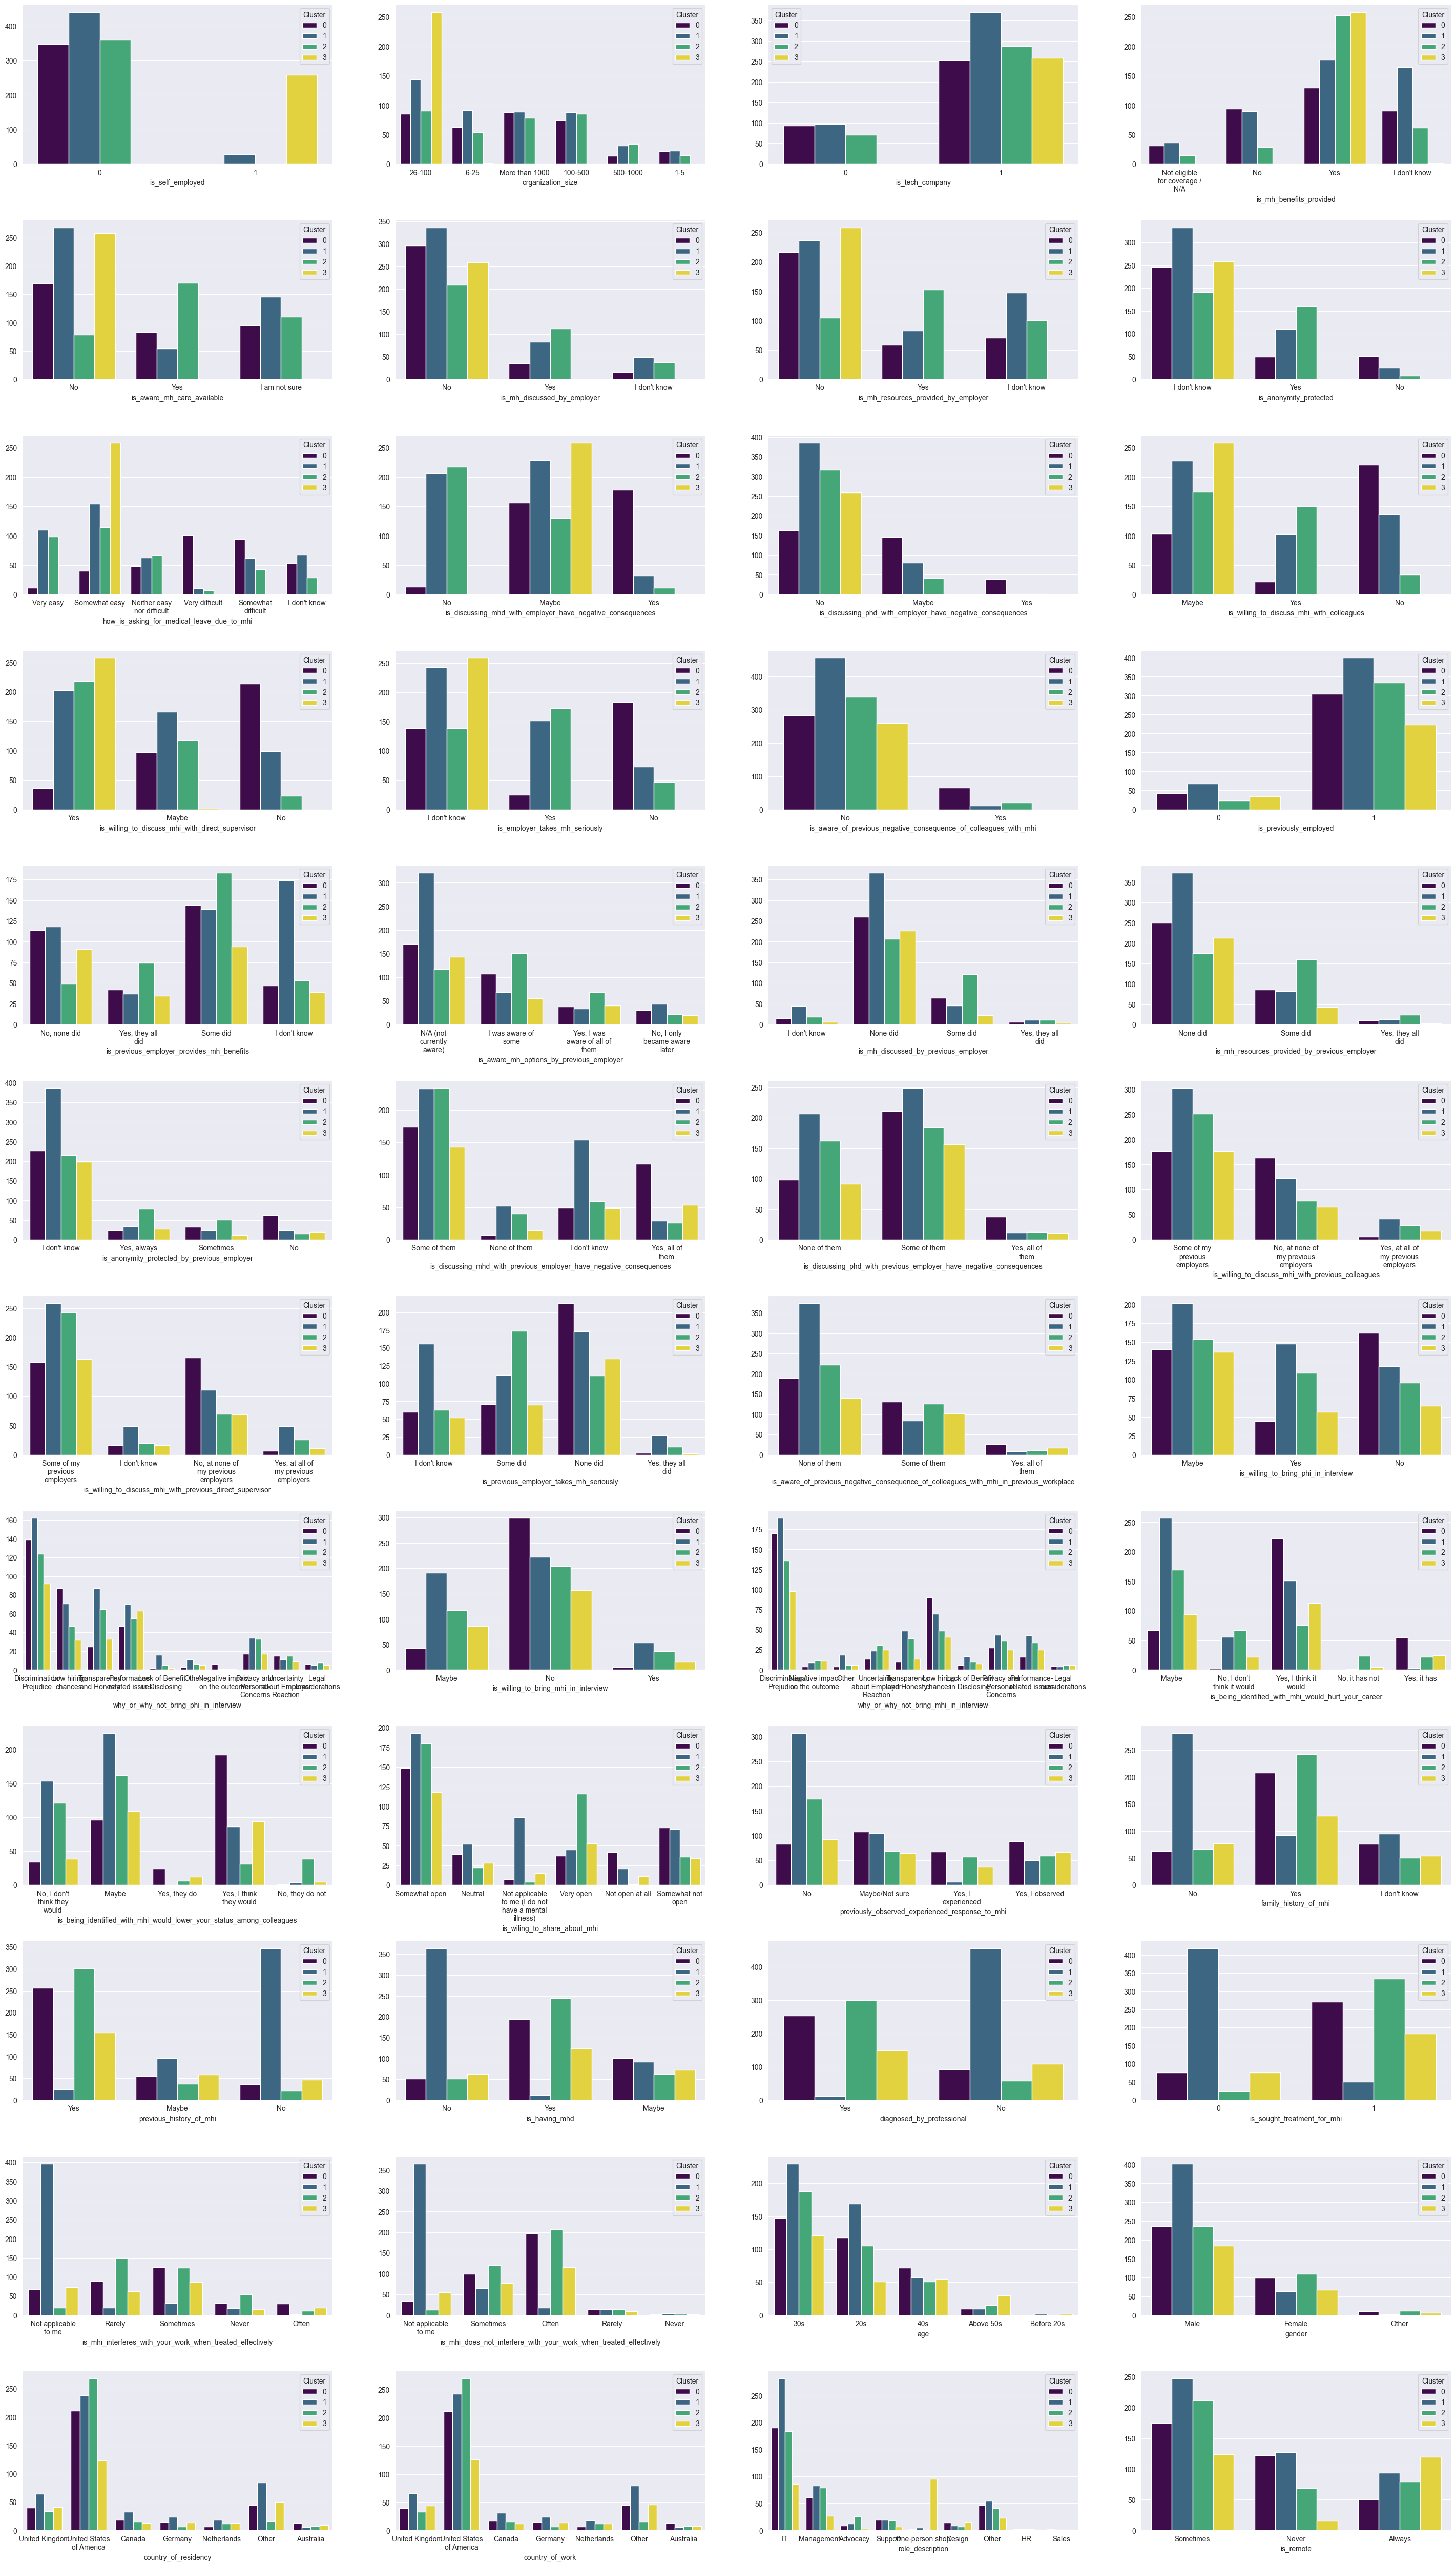

In [7]:
# Initiate a new figure, axes, and iterator
fig, axes = plt.subplots(12, 4, figsize=(36, 64))
iterator = iter(df.columns)

# Adjust the spacing between plots
fig.subplots_adjust(hspace=0.35)

# Start a for-loop
for i in range(12): # Selecting a row 
    for j in range(4): # Selecting a column
        # Generating a plot
        sns.countplot(x=next(iterator), hue="Cluster", data=df, palette="viridis", ax=axes[i, j])
        axes[i, j].set_ylabel("")
        axes[i, j].set_xticklabels([textwrap.fill(label.get_text(), 15) for label in axes[i, j].get_xticklabels()])

# Save the plot
plt.savefig(f'{path}/assets/Fig13 - Clusters Profiling.png', bbox_inches='tight', dpi=300)
    
# Show the plot
plt.show()

Now, let's have an entire overview on the biggest values in each cluster to define them.

In [6]:
# Start the loop
for i in range(4):
    print(f"--- Start of Cluster {i+1} -------------------------------------------------------------------------------------")
    
    cluster_df = df[df["Cluster"] == i]
    
    for column in cluster_df.columns:
        
        temp = (pd.DataFrame(cluster_df[column].value_counts()).
                reset_index().
                sort_values(by="count", ascending=False))

        print(f"{column} --- {temp.iloc[0, 0]} : {temp.iloc[0, 1]}")

    print(f"------------------------------------------------------------------------------------- End of Cluster {i+1} -----")

--- Start of Cluster 1 -------------------------------------------------------------------------------------
is_self_employed --- 0 : 347
organization_size --- More than 1000 : 88
is_tech_company --- 1 : 253
is_mh_benefits_provided --- Yes : 130
is_aware_mh_care_available --- No : 169
is_mh_discussed_by_employer --- No : 296
is_mh_resources_provided_by_employer --- No : 217
is_anonymity_protected --- I don't know : 246
how_is_asking_for_medical_leave_due_to_mhi --- Very difficult : 101
is_discussing_mhd_with_employer_have_negative_consequences --- Yes : 178
is_discussing_phd_with_employer_have_negative_consequences --- No : 162
is_willing_to_discuss_mhi_with_colleagues --- No : 221
is_willing_to_discuss_mhi_with_direct_supervisor --- No : 214
is_employer_takes_mh_seriously --- No : 183
is_aware_of_previous_negative_consequence_of_colleagues_with_mhi --- No : 282
is_previously_employed --- 1 : 305
is_previous_employer_provides_mh_benefits --- Some did : 144
is_aware_mh_options_by_previo

### Cluster 1 
- is_self_employed --- 0 : 347
- organization_size --- More than 1000 : 88
- is_tech_company --- 1 : 253
- is_mh_benefits_provided --- Yes : 130
- is_aware_mh_care_available --- No : 169
- is_mh_discussed_by_employer --- No : 296
- is_mh_resources_provided_by_employer --- No : 217
- is_anonymity_protected --- I don't know : 246
- how_is_asking_for_medical_leave_due_to_mhi --- Very difficult : 101
- is_discussing_mhd_with_employer_have_negative_consequences --- Yes : 178
- is_discussing_phd_with_employer_have_negative_consequences --- No : 162
- is_willing_to_discuss_mhi_with_colleagues --- No : 221
- is_willing_to_discuss_mhi_with_direct_supervisor --- No : 214
- is_employer_takes_mh_seriously --- No : 183
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi --- No : 282
- is_previously_employed --- 1 : 305
- is_previous_employer_provides_mh_benefits --- Some did : 144
- is_aware_mh_options_by_previous_employer --- N/A (not currently aware) : 170
- is_mh_discussed_by_previous_employer --- None did : 260
- is_mh_resources_provided_by_previous_employer --- None did : 250
- is_anonymity_protected_by_previous_employer --- I don't know : 228
- is_discussing_mhd_with_previous_employer_have_negative_consequences --- Some of them : 174
- is_discussing_phd_with_previous_employer_have_negative_consequences --- Some of them : 211
- is_willing_to_discuss_mhi_with_previous_colleagues --- Some of my previous employers : 177
- is_willing_to_discuss_mhi_with_previous_direct_supervisor --- No, at none of my previous employers : 166
- is_previous_employer_takes_mh_seriously --- None did : 213
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace --- None of them : 190
- is_willing_to_bring_phi_in_interview --- No : 162
- why_or_why_not_bring_phi_in_interview --- Discrimination/Prejudice : 139
- is_willing_to_bring_mhi_in_interview --- No : 299
- why_or_why_not_bring_mhi_in_interview --- Discrimination/Prejudice : 170
- is_being_identified_with_mhi_would_hurt_your_career --- Yes, I think it would : 223
- is_being_identified_with_mhi_would_lower_your_status_among_colleagues --- Yes, I think they would : 192
- is_wiling_to_share_about_mhi --- Somewhat open : 149
- previously_observed_experienced_response_to_mhi --- Maybe/Not sure : 108
- family_history_of_mhi --- Yes : 208
- previous_history_of_mhi --- Yes : 256
- is_having_mhd --- Yes : 194
- diagnosed_by_professional --- Yes : 254
- is_sought_treatment_for_mhi --- 1 : 271
- is_mhi_interferes_with_your_work_when_treated_effectively --- Sometimes : 126
- is_mhi_does_not_interfere_with_your_work_when_treated_effectively --- Often : 197
- age --- 30s : 147
- gender --- Male : 237
- country_of_residency --- United States of America : 211
- country_of_work --- United States of America : 212
- role_description --- IT : 191
- is_remote --- Sometimes : 175

### Cluster 2 
- is_self_employed --- 0 : 439
- organization_size --- 26-100 : 144
- is_tech_company --- 1 : 370
- is_mh_benefits_provided --- Yes : 177
- is_aware_mh_care_available --- No : 268
- is_mh_discussed_by_employer --- No : 336
- is_mh_resources_provided_by_employer --- No : 237
- is_anonymity_protected --- I don't know : 333
- how_is_asking_for_medical_leave_due_to_mhi --- Somewhat easy : 155
- is_discussing_mhd_with_employer_have_negative_consequences --- Maybe : 229
- is_discussing_phd_with_employer_have_negative_consequences --- No : 386
- is_willing_to_discuss_mhi_with_colleagues --- Maybe : 228
- is_willing_to_discuss_mhi_with_direct_supervisor --- Yes : 203
- is_employer_takes_mh_seriously --- I don't know : 243
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi --- No : 456
- is_previously_employed --- 1 : 400
- is_previous_employer_provides_mh_benefits --- I don't know : 174
- is_aware_mh_options_by_previous_employer --- N/A (not currently aware) : 321
- is_mh_discussed_by_previous_employer --- None did : 366
- is_mh_resources_provided_by_previous_employer --- None did : 373
- is_anonymity_protected_by_previous_employer --- I don't know : 387
- is_discussing_mhd_with_previous_employer_have_negative_consequences --- Some of them : 233
- is_discussing_phd_with_previous_employer_have_negative_consequences --- Some of them : 249
- is_willing_to_discuss_mhi_with_previous_colleagues --- Some of my previous employers : 303
- is_willing_to_discuss_mhi_with_previous_direct_supervisor --- Some of my previous employers : 259
- is_previous_employer_takes_mh_seriously --- None did : 173
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace --- None of them : 375
- is_willing_to_bring_phi_in_interview --- Maybe : 202
- why_or_why_not_bring_phi_in_interview --- Discrimination/Prejudice : 162
- is_willing_to_bring_mhi_in_interview --- No : 223
- why_or_why_not_bring_mhi_in_interview --- Discrimination/Prejudice : 189
- is_being_identified_with_mhi_would_hurt_your_career --- Maybe : 257
- is_being_identified_with_mhi_would_lower_your_status_among_colleagues --- Maybe : 224
- is_wiling_to_share_about_mhi --- Somewhat open : 193
- previously_observed_experienced_response_to_mhi --- No : 307
- family_history_of_mhi --- No : 281
- previous_history_of_mhi --- No : 347
- is_having_mhd --- No : 364
- diagnosed_by_professional --- No : 456
- is_sought_treatment_for_mhi --- 0 : 418
- is_mhi_interferes_with_your_work_when_treated_effectively --- Not applicable to me : 397
- is_mhi_does_not_interfere_with_your_work_when_treated_effectively --- Not applicable to me : 366
- age --- 30s : 230
- gender --- Male : 403
- country_of_residency --- United States of America : 238
- country_of_work --- United States of America : 243
- role_description --- IT : 282
- is_remote --- Sometimes : 247

### Cluster 3 
- is_self_employed --- 0 : 359
- organization_size --- 26-100 : 91
- is_tech_company --- 1 : 288
- is_mh_benefits_provided --- Yes : 253
- is_aware_mh_care_available --- Yes : 170
- is_mh_discussed_by_employer --- No : 209
- is_mh_resources_provided_by_employer --- Yes : 153
- is_anonymity_protected --- I don't know : 191
- how_is_asking_for_medical_leave_due_to_mhi --- Somewhat easy : 114
- is_discussing_mhd_with_employer_have_negative_consequences --- No : 218
- is_discussing_phd_with_employer_have_negative_consequences --- No : 317
- is_willing_to_discuss_mhi_with_colleagues --- Maybe : 175
- is_willing_to_discuss_mhi_with_direct_supervisor --- Yes : 218
- is_employer_takes_mh_seriously --- Yes : 173
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi --- No : 338
- is_previously_employed --- 1 : 335
- is_previous_employer_provides_mh_benefits --- Some did : 183
- is_aware_mh_options_by_previous_employer --- I was aware of some : 151
- is_mh_discussed_by_previous_employer --- None did : 207
- is_mh_resources_provided_by_previous_employer --- None did : 175
- is_anonymity_protected_by_previous_employer --- I don't know : 215
- is_discussing_mhd_with_previous_employer_have_negative_consequences --- Some of them : 234
- is_discussing_phd_with_previous_employer_have_negative_consequences --- Some of them : 184
- is_willing_to_discuss_mhi_with_previous_colleagues --- Some of my previous employers : 252
- is_willing_to_discuss_mhi_with_previous_direct_supervisor --- Some of my previous employers : 243
- is_previous_employer_takes_mh_seriously --- Some did : 174
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace --- None of them : 222
- is_willing_to_bring_phi_in_interview --- Maybe : 154
- why_or_why_not_bring_phi_in_interview --- Discrimination/Prejudice : 124
- is_willing_to_bring_mhi_in_interview --- No : 204
- why_or_why_not_bring_mhi_in_interview --- Discrimination/Prejudice : 136
- is_being_identified_with_mhi_would_hurt_your_career --- Maybe : 170
- is_being_identified_with_mhi_would_lower_your_status_among_colleagues --- Maybe : 162
- is_wiling_to_share_about_mhi --- Somewhat open : 180
- previously_observed_experienced_response_to_mhi --- No : 174
- family_history_of_mhi --- Yes : 242
- previous_history_of_mhi --- Yes : 301
- is_having_mhd --- Yes : 245
- diagnosed_by_professional --- Yes : 300
- is_sought_treatment_for_mhi --- 1 : 335
- is_mhi_interferes_with_your_work_when_treated_effectively --- Rarely : 150
- is_mhi_does_not_interfere_with_your_work_when_treated_effectively --- Often : 207
- age --- 30s : 188
- gender --- Male : 237
- country_of_residency --- United States of America : 268
- country_of_work --- United States of America : 270
- role_description --- IT : 184
- is_remote --- Sometimes : 211

### Cluster 4 
- is_self_employed --- 1 : 258
- organization_size --- 26-100 : 258
- is_tech_company --- 1 : 259
- is_mh_benefits_provided --- Yes : 258
- is_aware_mh_care_available --- No : 258
- is_mh_discussed_by_employer --- No : 259
- is_mh_resources_provided_by_employer --- No : 259
- is_anonymity_protected --- I don't know : 259
- how_is_asking_for_medical_leave_due_to_mhi --- Somewhat easy : 259
- is_discussing_mhd_with_employer_have_negative_consequences --- Maybe : 259
- is_discussing_phd_with_employer_have_negative_consequences --- No : 259
- is_willing_to_discuss_mhi_with_colleagues --- Maybe : 259
- is_willing_to_discuss_mhi_with_direct_supervisor --- Yes : 258
- is_employer_takes_mh_seriously --- I don't know : 259
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi --- No : 259
- is_previously_employed --- 1 : 224
- is_previous_employer_provides_mh_benefits --- Some did : 94
- is_aware_mh_options_by_previous_employer --- N/A (not currently aware) : 143
- is_mh_discussed_by_previous_employer --- None did : 226
- is_mh_resources_provided_by_previous_employer --- None did : 213
- is_anonymity_protected_by_previous_employer --- I don't know : 199
- is_discussing_mhd_with_previous_employer_have_negative_consequences --- Some of them : 143
- is_discussing_phd_with_previous_employer_have_negative_consequences --- Some of them : 156
- is_willing_to_discuss_mhi_with_previous_colleagues --- Some of my previous employers : 177
- is_willing_to_discuss_mhi_with_previous_direct_supervisor --- Some of my previous employers : 163
- is_previous_employer_takes_mh_seriously --- None did : 135
- is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace --- None of them : 140
- is_willing_to_bring_phi_in_interview --- Maybe : 137
- why_or_why_not_bring_phi_in_interview --- Discrimination/Prejudice : 92
- is_willing_to_bring_mhi_in_interview --- No : 157
- why_or_why_not_bring_mhi_in_interview --- Discrimination/Prejudice : 98
- is_being_identified_with_mhi_would_hurt_your_career --- Yes, I think it would : 113
- is_being_identified_with_mhi_would_lower_your_status_among_colleagues --- Maybe : 109
- is_wiling_to_share_about_mhi --- Somewhat open : 118
- previously_observed_experienced_response_to_mhi --- No : 92
- family_history_of_mhi --- Yes : 128
- previous_history_of_mhi --- Yes : 154
- is_having_mhd --- Yes : 124
- diagnosed_by_professional --- Yes : 150
- is_sought_treatment_for_mhi --- 1 : 183
- is_mhi_interferes_with_your_work_when_treated_effectively --- Sometimes : 87
- is_mhi_does_not_interfere_with_your_work_when_treated_effectively --- Often : 116
- age --- 30s : 121
- gender --- Male : 185
- country_of_residency --- United States of America : 123
- country_of_work --- United States of America : 126
- role_description --- One-person shop : 96
- is_remote --- Sometimes : 124

## Summary

In this notebook, we discussed the following aspects :
- Visualizing the clusters.
- Identifying their characteristics.

## Author
<a href="https://www.linkedin.com/in/ab0858s/">Abdelali BARIR</a> is a former veteran in the Moroccan's Royal Armed Forces, and a self-taught python programmer. Currently enrolled in B.Sc. Data Science in __IU International University of Applied Sciences__.

## Change Log
| Date         | Version | Changed By     | Change Description      |
|--------------|---------|----------------|-------------------------|
| 2024-07-10   | 1.0     | Abdelali Barir | Modified markdown       |
| ------------ |---------|----------------|-------------------------|